<a href="#"><img align="left" alt="Python" src="https://img.shields.io/badge/Python-013243.svg?logo=python&logoColor=white"></a>
<a href="#"><img align="left" alt="Pandas" src="https://img.shields.io/badge/Pandas-150458.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="NumPy" src="https://img.shields.io/badge/Numpy-2a4d69.svg?logo=numpy&logoColor=white"></a>
<a href="#"><img align="left" alt="Matplotlib" src="https://img.shields.io/badge/Matplotlib-8DF9C1.svg?logo=matplotlib&logoColor=white"></a>
<a href="#"><img align="left" alt="seaborn" src="https://img.shields.io/badge/seaborn-65A9A8.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="plotly" src="https://img.shields.io/badge/plotly-adcbe3.svg?logo=plotly&logoColor=white"></a>
<a href="#"><img align="left" alt="sklearn" src="https://img.shields.io/badge/sklearn-4b86b4.svg?logo=scikitlearn&logoColor=white"></a>
<a href="#"><img align="left" alt="SciPy" src="https://img.shields.io/badge/SciPy-1560bd.svg?logo=scipy&logoColor=white"></a>

In [53]:
from imports import *
%matplotlib inline

# Display format
pd.options.display.float_format = '{:,.2f}'.format

In [54]:
# Data acquisition

df = acquire.get_zillow_data()

In [55]:
df.shape

(52441, 11)

In [56]:
# Data Preparation

df = prepare.prep_zillow(df)

In [67]:
df.shape

(49633, 23)

In [57]:
df.head()

longitude   latitude  bedrooms  bathrooms  square_feet  lot_size  \
0  -118,740133  34,251502      4.00       2.00     1,323.00  6,825.00   
1  -118,217048  33,798657      4.00       2.00     1,339.00  6,107.00   
2  -118,531253  34,039467      2.00       2.00     1,231.00 11,837.00   
3  -117,613897  33,663005      5.00       3.00     3,008.00  6,760.00   
4  -118,393309  34,227422      2.00       1.00       996.00  7,518.00   

   has_pool fips_code  age  assessed_value  ...  bathrooms_size  \
0      0.00     06111   53      453,000.00  ...           small   
1      0.00     06037   40      298,371.00  ...           small   
2      0.00     06037   67      161,897.00  ...           small   
3      1.00     06059   22      472,384.00  ...          medium   
4      0.00     06037   77       58,693.00  ...           small   

  county_Los Angeles county_Orange county_Ventura  bedrooms_size_small  \
0                  0             0              1                    0   
1                  1             0              0                    0   
2                  1             0              0                    1   
3                  0             1              0                    0   
4                  1             0              0                    1   

   bedrooms_size_medium  bedrooms_size_large  bathrooms_size_small  \
0                     1                    0                     1   
1                     1                    0                     1   
2                     0                    0                     1   
3                     0                    1                     0   
4                     0                    0                     1   

   bathrooms_size_medium  bathrooms_size_large  
0                      0                     0  
1                      0                     0  
2                      0                     0  
3                      1                     0  
4                      0                     0  

[5 rows x 23 columns]

In [58]:
# Splitting data into train, validate, test

train,validate,test = prepare.split(df)

In [46]:
train.dtypes

longitude                  object
latitude                   object
bedrooms                  float64
bathrooms                 float64
square_feet               float64
lot_size                  float64
has_pool                  float64
fips_code                  object
age                         int64
assessed_value            float64
tax_amount                float64
county                     object
bedrooms_size            category
bathrooms_size           category
county_Los Angeles          uint8
county_Orange               uint8
county_Ventura              uint8
bedrooms_size_small         uint8
bedrooms_size_medium        uint8
bedrooms_size_large         uint8
bathrooms_size_small        uint8
bathrooms_size_medium       uint8
bathrooms_size_large        uint8
dtype: object

In [ ]:
# pairplot function

def plot_variable_pairs(df):
    return sns.pairplot(df, corner = True, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'s': 1, 'alpha': 0.5}})

In [ ]:
# plot_variable_pairs(train)

# Exploration

## Question 1. What associated with `assessed_value` the most?

In [8]:
continuous_cols = ['square_feet', 'lot_size', 'age', 'assessed_value']

In [9]:
train_corr = train[continuous_cols].corr()
train_corr

square_feet  lot_size   age  assessed_value
square_feet            1.00      0.31 -0.48            0.58
lot_size               0.31      1.00 -0.10            0.15
age                   -0.48     -0.10  1.00           -0.22
assessed_value         0.58      0.15 -0.22            1.00

<AxesSubplot:>

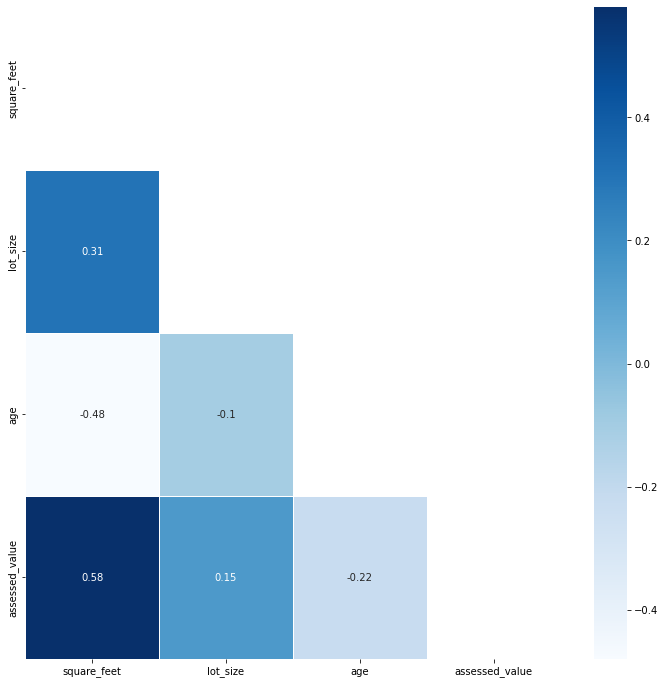

In [10]:
plt.figure(figsize = (12,12))
sns.heatmap(train_corr,cmap='Blues', annot=True, linewidth=0.5, mask= np.triu(train_corr))

### Pearson R

In [66]:
corr, p = stats.pearsonr(train.assessed_value, train.square_feet)
corr, p

(0.5799930488716987, 0.0)

Pearson R test shows us the correlation between assessed value and square feet.

## Answer 1:
**square_feet** has strong positive (0.58) correlation with **assessed_value**

Text(0.5, 1.0, 'Assessed Value by Square Feet')

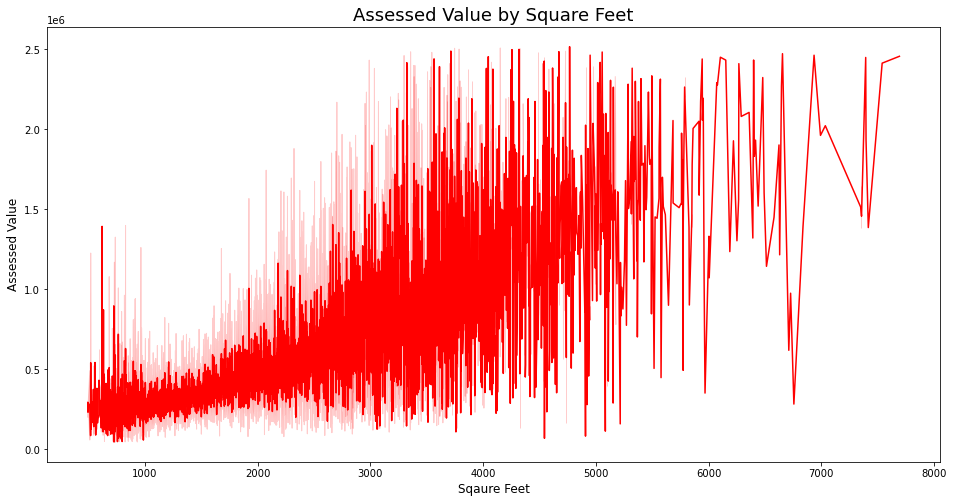

In [11]:
plt.figure(figsize = (16,8))
sns.lineplot(x = train.square_feet, y = train.assessed_value, color = 'red', data = train)
plt.xlabel('Sqaure Feet', fontsize = 12)
plt.ylabel('Assessed Value', fontsize = 12)
plt.title('Assessed Value by Square Feet', fontsize = 18)

***

## Question 2. Is `assessed_value` significantly different across 3 different counties?

In [12]:
train.groupby('county').assessed_value.mean()

county
Los Angeles   431,371.49
Orange        544,886.75
Ventura       488,414.72
Name: assessed_value, dtype: float64

Text(0, 0.5, 'Assessed Value')

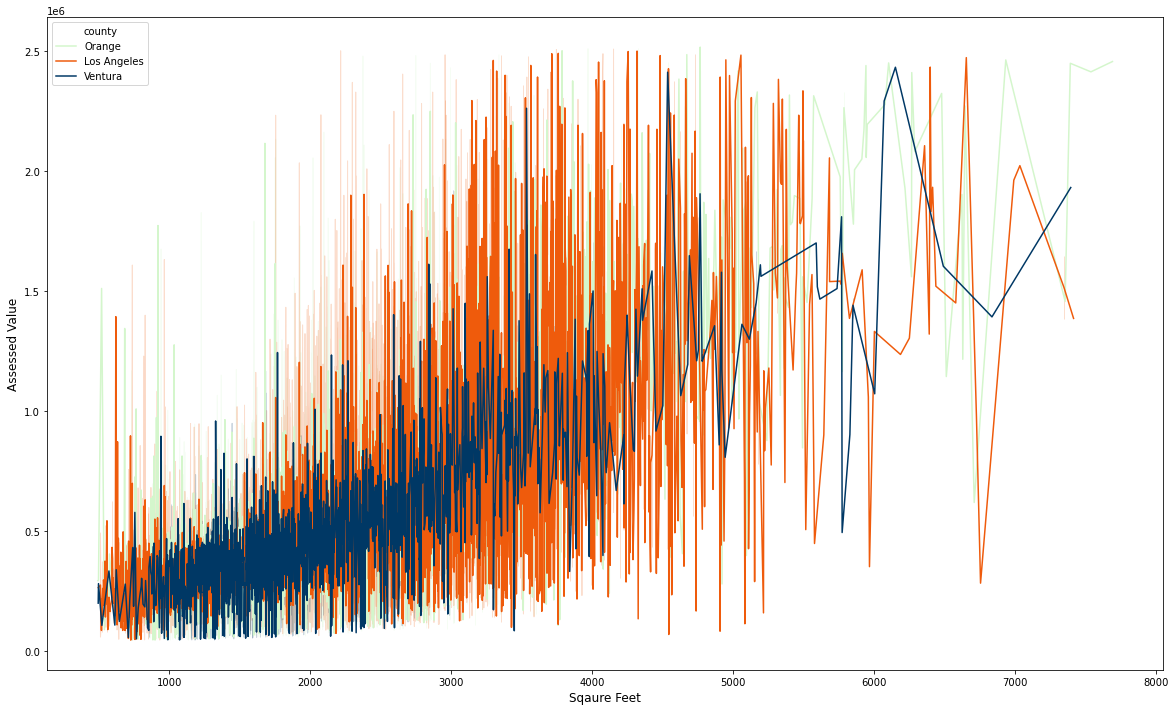

In [12]:
plt.figure(figsize = (20,12))
colors = ['#D4F6CC', '#EF5B0C', '#003865']
sns.lineplot(x = train.square_feet, y = train.assessed_value, palette = colors, data = train, hue = 'county')
plt.xlabel('Sqaure Feet', fontsize = 12)
plt.ylabel('Assessed Value', fontsize = 12)

In [64]:
fig = px.box(train, x="county", y="assessed_value", points="all", color = 'county')
fig.update_xaxes(categoryorder = 'mean ascending')
fig.show()

Text(0.5, 1.0, 'Distribution of Property Tax Assessed Value per County')

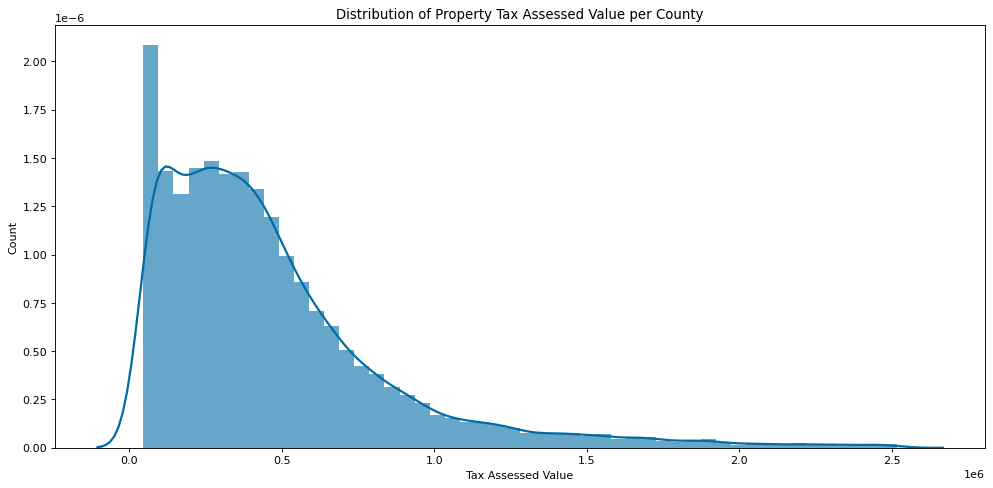

In [61]:
plt.figure(figsize=(15,7), dpi= 80)
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(train.assessed_value, color="#006ba4", label="Assessed_Value", **kwargs)
plt.xlabel('Tax Assessed Value')
plt.ylabel('Count')
plt.title('Distribution of Property Tax Assessed Value per County')

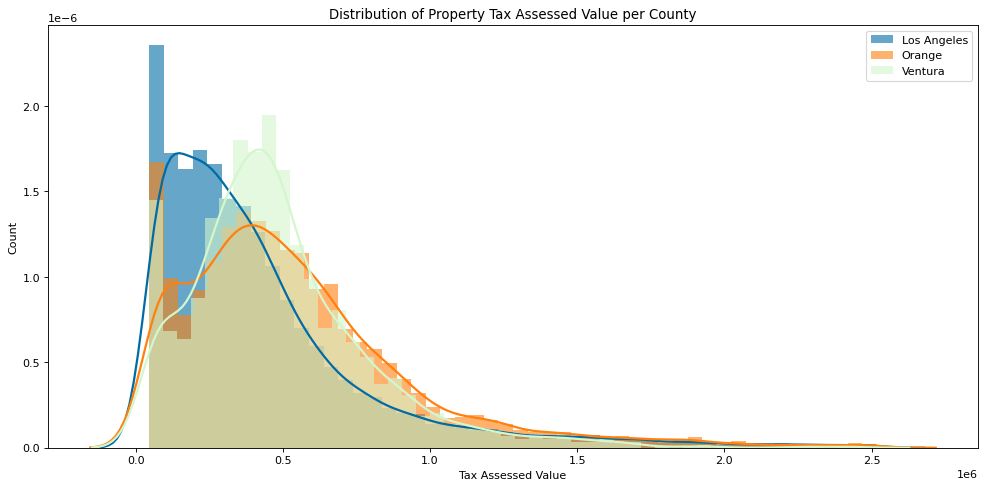

In [14]:
# Visualizing distribution of assessed_value per county

losangeles = train[train['county'] == 'Los Angeles'].assessed_value
orange = train[train['county'] == 'Orange'].assessed_value
ventura = train[train['county'] == 'Ventura'].assessed_value

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
sns.distplot(losangeles, color="#006ba4", label="Los Angeles", **kwargs)
sns.distplot(orange, color="#ff800e", label="Orange", **kwargs)
sns.distplot(ventura, color="#D4F6CC", label="Ventura", **kwargs)
plt.xlabel('Tax Assessed Value')
plt.ylabel('Count')
plt.title('Distribution of Property Tax Assessed Value per County')
plt.legend();

In [ ]:
# Visualizing location
# fig = px.choropleth(train, locations=["CA"], locationmode="USA-states", color=[1], scope="usa")
 
# fig.show()

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of Los Angeles, Orange, and Ventura County are all equal.

$H_{a}$: Mean of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal.

**Set Alpha**

In [14]:
alpha = 0.05

**Verify Assumptions**

- Normal: Yes
- Independent: Yes
- Variance: False

**Decide**

In [15]:
t, p = stats.f_oneway(losangeles, orange, ventura)
if p < alpha:
    print("We reject H0. \nMean of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal. ")
else:
    print("We fail to reject H0")

We reject H0. 
Mean of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal. 


## Answer 2:
**Orange county** has the highest tax assessed value on average

**Los Angeles county** has the loweset property tax assessed value on average

***

## Question 3. Is having pool positively associated with `assessed value`?

In [62]:
fig = px.box(train, x="has_pool", y="assessed_value", points="all", color = 'has_pool', color_discrete_sequence=['#ff800e','#006ba4'])
fig.show()

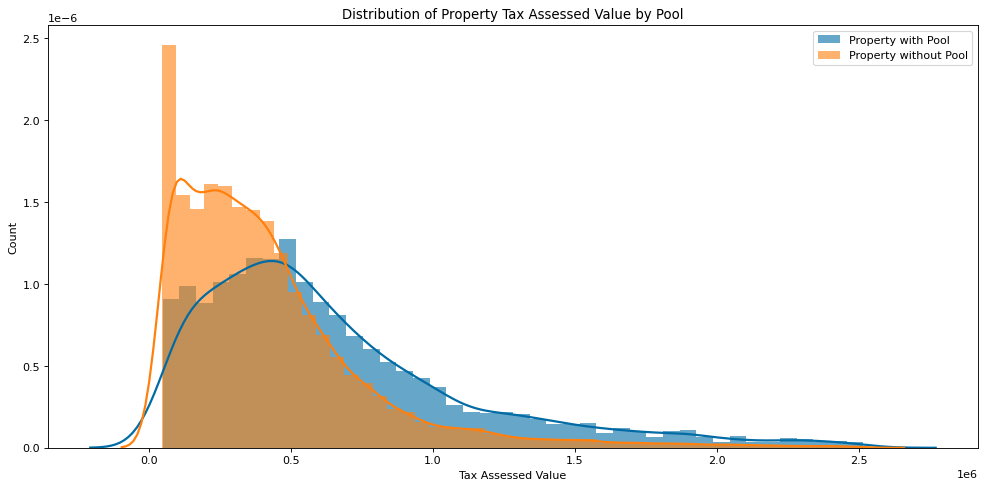

In [17]:
# Visualizing distribution of assessed_value for has_pool or not

pool = train[train['has_pool'] == 1].assessed_value
no_pool = train[train['has_pool'] == 0].assessed_value

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
sns.distplot(pool, color="#006ba4", label="Property with Pool", **kwargs)
sns.distplot(no_pool, color="#ff800e", label="Property without Pool", **kwargs)

plt.xlabel('Tax Assessed Value')
plt.ylabel('Count')
plt.title('Distribution of Property Tax Assessed Value by Pool')
plt.legend();

### Independent T-Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of property with pool <= Mean of property tax assessed value of property without pool.

$H_{a}$: Mean of property tax assessed value of property with pool > Mean of property tax assessed value of property without pool.

**Set Alpha**

In [ ]:
alpha = 0.05

**Verify Assumptions**

- Normal: Yes
- Independent: Yes
- Variance: False

**Decide**

In [30]:
t, p = stats.ttest_ind(pool, no_pool, equal_var=False)
if p/2 < alpha:
    print("We reject H0. \nMean of property tax assessed value of property with pool > Mean of property tax assessed value of property without pool. ")
else:
    print("We fail to reject H0")

We reject H0. 
Mean of property tax assessed value of property with pool > Mean of property tax assessed value of property without pool. 


## Answer 3:
Proepeties with pool has a higher tax assessed value on average than properties without pool.

***

## Question 4. Is number of bedrooms and bathrooms associated with `assessed value`?

**Bedrooms**

In [42]:
fig = px.box(train, x="bedrooms_size", y="assessed_value", points="all", color = 'bedrooms_size',  color_discrete_sequence=[ '#fec44f','#993404','#ffffd4'])
fig.update_xaxes(categoryorder = 'category descending')
fig.show()

<AxesSubplot:xlabel='bedrooms', ylabel='assessed_value'>

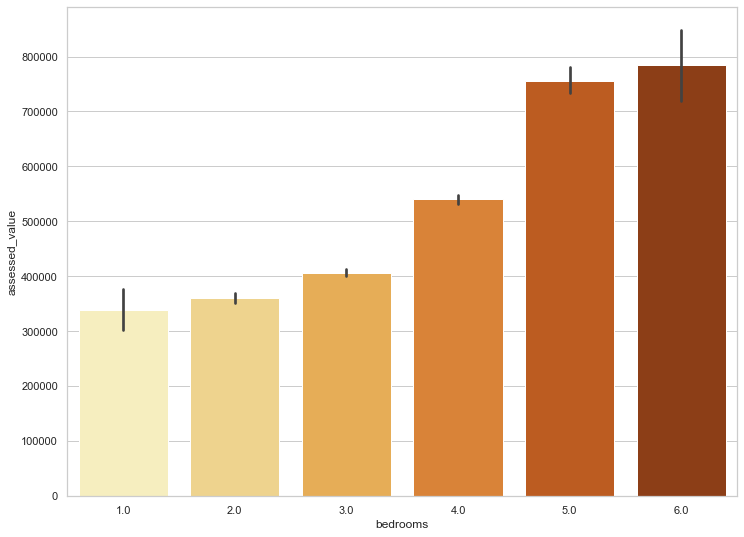

In [19]:
plt.figure(figsize = (12,9))
sns.set_theme(style="whitegrid")
sns.barplot(x="bedrooms", y="assessed_value", data=train, palette="YlOrBr")

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of small, medium, large bedrooms are all equal.

$H_{a}$: Mean of property tax assessed value of small, medium, large bedrooms are not all equal.

**Set Alpha**

In [20]:
alpha = 0.05

**Verify Assumptions**

- Normal: Yes
- Independent: Yes
- Variance: False

In [21]:
smallbed = train[train['bedrooms_size']=='small'].assessed_value
mediumbed = train[train['bedrooms_size']=='medium'].assessed_value
largebed = train[train['bedrooms_size']=='large'].assessed_value
t, p = stats.f_oneway(smallbed, mediumbed, largebed)
if p < alpha:
    print("We reject H0. \nMean of property tax assessed value of small, medium, large bedrooms are not all equal. ")
else:
    print("We fail to reject H0")

We reject H0. 
Mean of property tax assessed value of small, medium, large bedrooms are not all equal. 


**Bathrooms**

In [44]:
fig = px.box(train, x="bathrooms_size", y="assessed_value", points="all", color = 'bathrooms_size', color_discrete_sequence=['#5d89af','#a9c2d5','#383f45'])
fig.update_xaxes(categoryorder = 'category descending')
fig.show()

<AxesSubplot:xlabel='bathrooms', ylabel='assessed_value'>

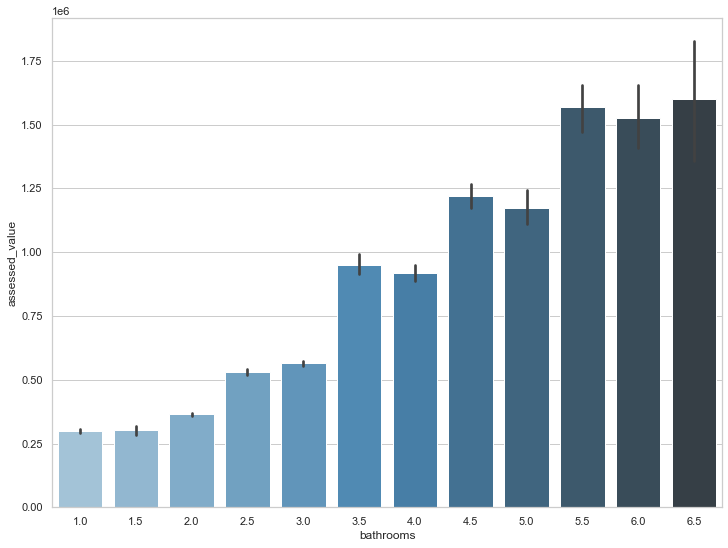

In [23]:
plt.figure(figsize = (12,9))
sns.set_theme(style="whitegrid")
sns.barplot(x="bathrooms", y="assessed_value", data=train, palette = 'Blues_d')


### ANOVA Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of small, medium, large bathrooms are all equal.

$H_{a}$: Mean of property tax assessed value of small, medium, large bathrooms are not all equal.

**Set Alpha**

In [63]:
alpha = 0.05

**Verify Assumptions**

- Normal: Yes
- Independent: Yes
- Variance: False

In [24]:
smallbath = train[train['bathrooms_size']=='small'].assessed_value
mediumbath = train[train['bathrooms_size']=='medium'].assessed_value
largebath = train[train['bathrooms_size']=='large'].assessed_value
t, p = stats.f_oneway(smallbath, mediumbath, largebath)
if p < alpha:
    print("We reject H0. \nMean of property tax assessed value of small, medium, large bathrooms are not all equal. ")
else:
    print("We fail to reject H0")

We reject H0. 
Mean of property tax assessed value of small, medium, large bathrooms are not all equal. 


## Answer 4:

Property tax assessed value is dependent on the size of bedrooms and bathrooms.

***

## Question 5: Does lot_size have a postive correlation with assessed_value?



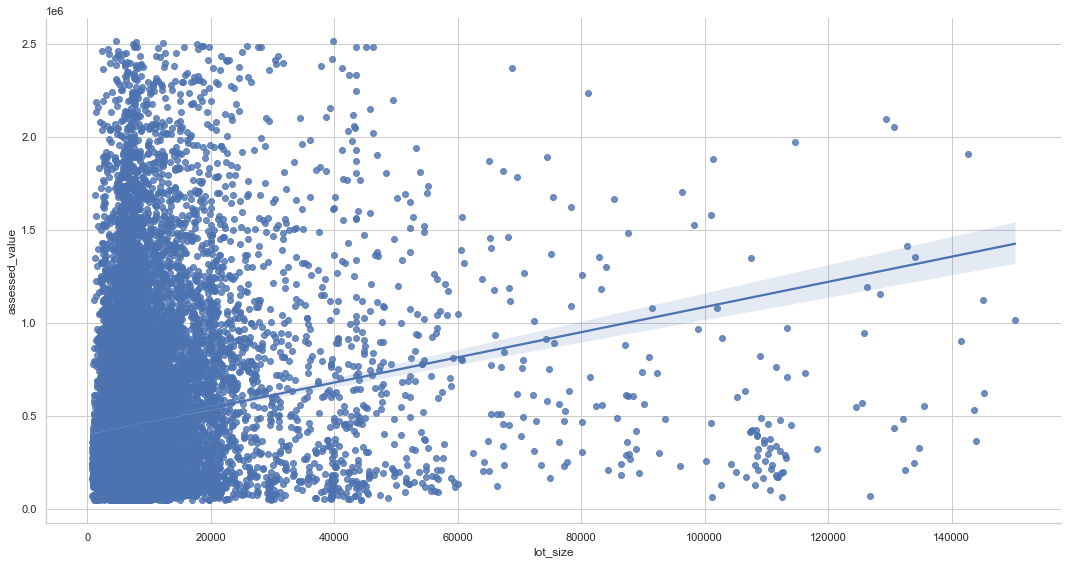

In [25]:
sns.lmplot(data = train, x='lot_size', y='assessed_value', palette = 'Set1', height=8, aspect=15/8)

In [23]:
import plotly.figure_factory as ff

# fips = train.fips_code
# values = train.assessed_value

# fig = ff.create_choropleth(fips=fips, values=values)
# fig.layout.template = None
# fig.show()

In [21]:
train.groupby('fips_code').assessed_value.mean()

fips_code
06037   431,371.49
06059   544,886.75
06111   488,414.72
Name: assessed_value, dtype: float64

In [52]:
values = [losangeles.mean(), orange.mean(), ventura.mean()]
fips = ['06037', '06059', '06111']

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(195, 196, 222)', 'rgb(144,148,194)',
    'rgb(101,104,168)',
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[410000, 450000, 490000], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 1}, round_legend_values=True,
    legend_title='Property Assessed Value by County', title='Southern California'
)
fig.layout.template = None
fig.show()

### Pearson R

In [68]:
r, p = stats.pearsonr(train.assessed_value, train.lot_size)
r, p

(0.14666471376343498, 1.91091163768898e-133)

The correlation between assessed value and lot size is 0.15

## Key Takeaways:

- Square feet has the strongest correlation with assessed value

- Lot size has a somewhat weak correlation with assessed value

- Bedroom and bathroom are both associated with assessed value

***

# Modeling
**Evaluation Metric:** RMSE - Average distance of each point from fitted regression line

### Baseline Prediction

In [ ]:
predictions

In [68]:
# Create a dataframe for predictions from all models including baseline
predictions = pd.DataFrame({
    'actual': train.assessed_value
}) 

In [70]:
# Set baseline prediction as the mean of assessed_value
predictions['baseline'] = train.assessed_value.mean()

In [74]:
# Calculating baseline root mean squared error
baseline_RMSE = mean_squared_error(predictions.actual, predictions.baseline, squared = False)
print('RMSE =', "{:.1f}".format(baseline_RMSE))

RMSE = 388607.0


### Scaling data

In [75]:
train.columns

Index(['longitude', 'latitude', 'bedrooms', 'bathrooms', 'square_feet',
       'lot_size', 'has_pool', 'fips_code', 'age', 'assessed_value',
       'tax_amount', 'county', 'bedrooms_size', 'bathrooms_size',
       'county_Los Angeles', 'county_Orange', 'county_Ventura',
       'bedrooms_size_small', 'bedrooms_size_medium', 'bedrooms_size_large',
       'bathrooms_size_small', 'bathrooms_size_medium',
       'bathrooms_size_large'],
      dtype='object')

In [ ]:
# Splitting data into X and y
cols = ['bedrooms', 'bathrooms', 'square_feet', 'lot_size', '']